In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
hrcs=pd.DataFrame(pd.read_csv("HR_comma_sep.csv"))
hrcs.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
for i in hrcs.columns:
    print(i,hrcs[i].unique())

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project [2 5 7 6 4 3]
average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

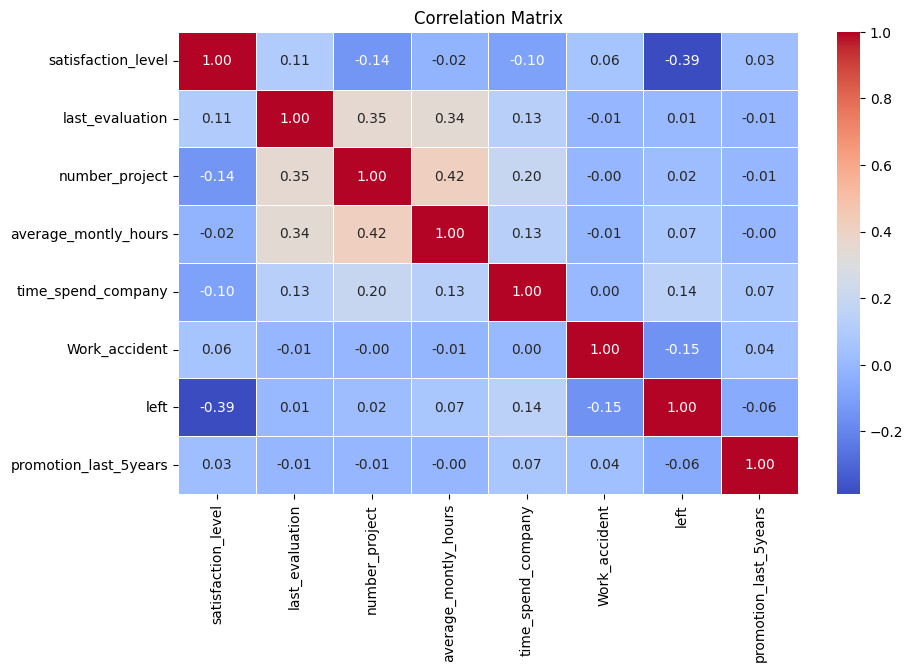

In [11]:
correlation_matrix = hrcs[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Feature Importances:
satisfaction_level: 0.4978
last_evaluation: 0.1526
number_project: 0.1012
average_montly_hours: 0.0926
time_spend_company: 0.1383
Work_accident: 0.0022
promotion_last_5years: 0.0000
Department: 0.0099
salary: 0.0055


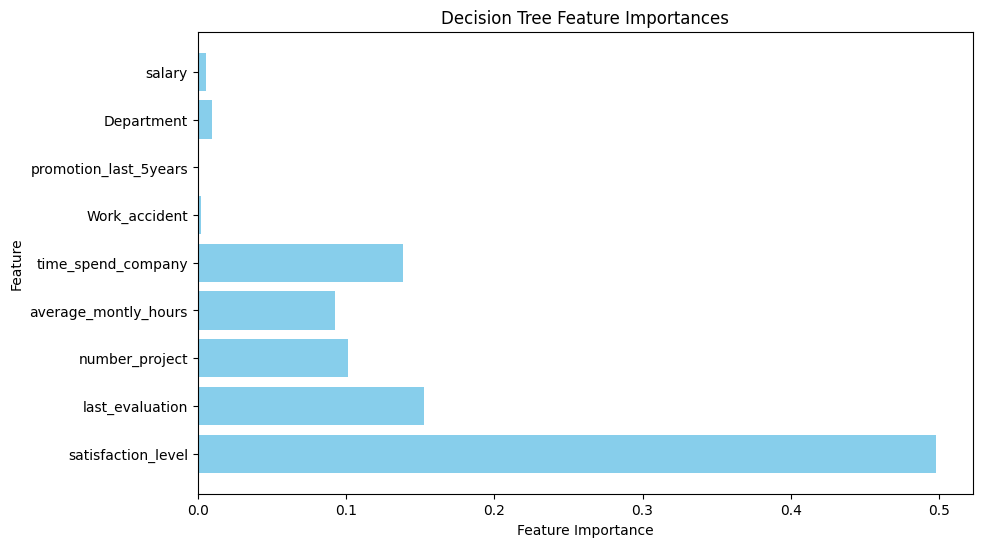

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

label_encoders = {}
for column in ['Department', 'salary']:
    le = LabelEncoder()
    hrcs[column] = le.fit_transform(hrcs[column])
    label_encoders[column] = le


X = hrcs[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
          'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
y = hrcs['left']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

feature_importances = dtree.feature_importances_


feature_names = X.columns
print("Feature Importances:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importances")
plt.show()


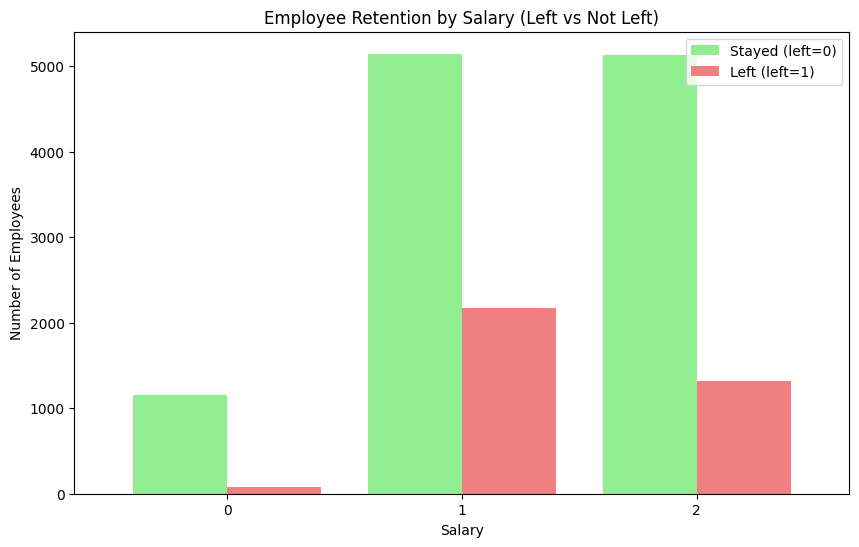

In [15]:
salary_retention_counts = hrcs.groupby(['salary', 'left']).size().unstack(fill_value=0)

salary_retention_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['lightgreen', 'lightcoral'])

plt.title('Employee Retention by Salary (Left vs Not Left)')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(['Stayed (left=0)', 'Left (left=1)'], loc='upper right')

plt.show()


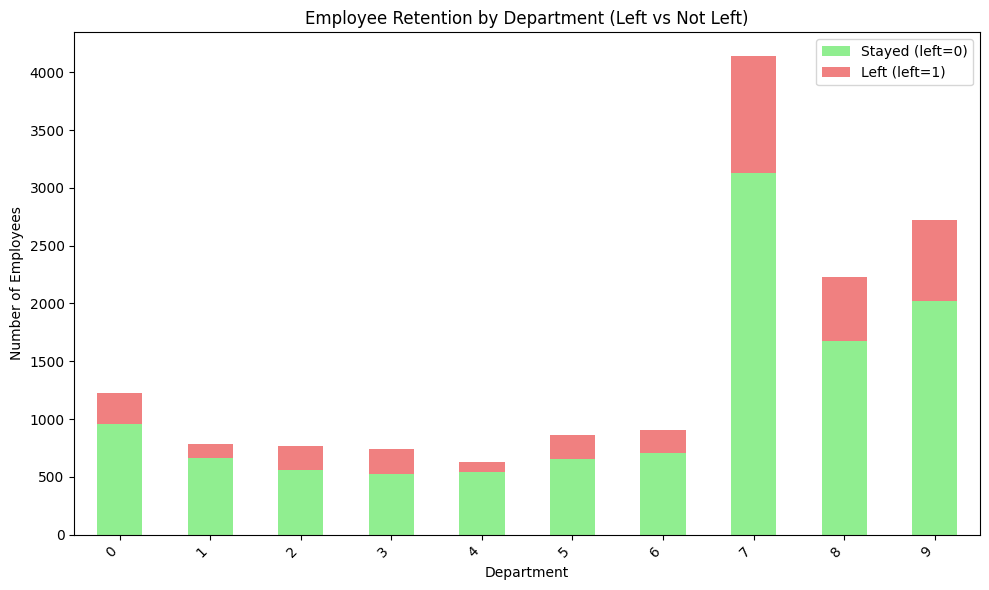

In [16]:
department_retention_counts = hrcs.groupby(['Department', 'left']).size().unstack(fill_value=0)

department_retention_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'lightcoral'])

plt.title('Employee Retention by Department (Left vs Not Left)')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(['Stayed (left=0)', 'Left (left=1)'], loc='upper right')


plt.tight_layout()
plt.show()

Accuracy: 0.7567
Confusion Matrix:
[[2102  192]
 [ 538  168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.47      0.24      0.32       706

    accuracy                           0.76      3000
   macro avg       0.63      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000



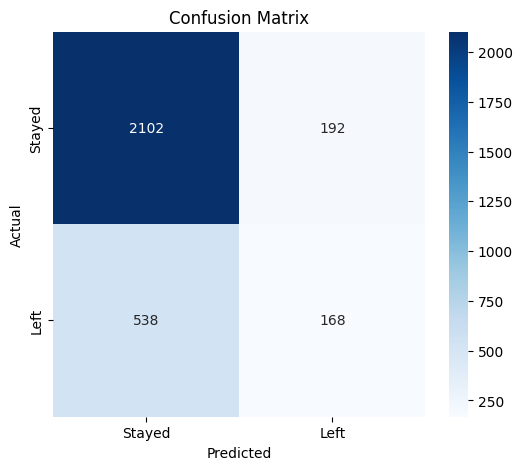

In [18]:
X = hrcs[['satisfaction_level', 'last_evaluation', 'number_project',
          'average_montly_hours', 'time_spend_company'
          ]]

y = hrcs['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
zct=pd.DataFrame(pd.read_csv("/content/zoo-class-type.csv"))
zct.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [21]:
for i in zct.columns:
    print(i,zct[i].unique())

Class_Number [1 2 3 4 5 6 7]
Number_Of_Animal_Species_In_Class [41 20  5 13  4  8 10]
Class_Type ['Mammal' 'Bird' 'Reptile' 'Fish' 'Amphibian' 'Bug' 'Invertebrate']
Animal_Names ['aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf'
 'chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren'
 'pitviper, seasnake, slowworm, tortoise, tuatara'
 'bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna'
 'frog, frog, newt, toad'
 'flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp'
 'clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.00


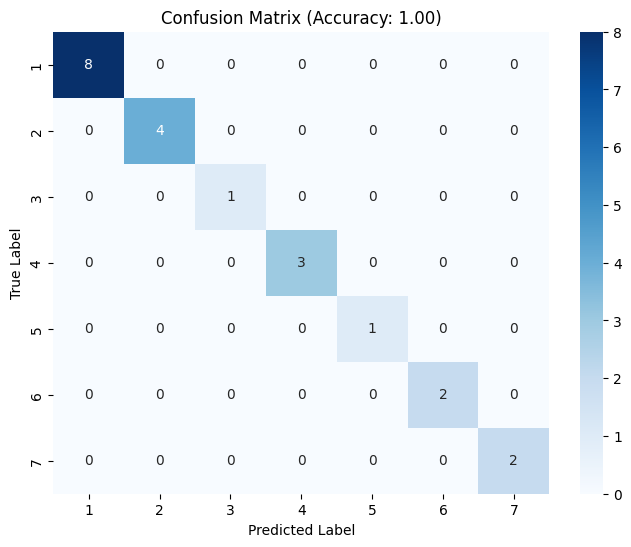

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

zoo_data_path = "/content/zoo-data.csv"
zoo_class_type_path = "/content/zoo-class-type.csv"

zoo_data = pd.read_csv(zoo_data_path)
zoo_class_type = pd.read_csv(zoo_class_type_path)

zoo_data = zoo_data.drop(columns=["animal_name"])

X = zoo_data.drop(columns=["class_type"])
y = zoo_data["class_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()
